In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist as cd

In [2]:
pos = np.arange(-5.0,5,0.1)

# <center> Kernel Density Estimation Using Gaussian Kernel </center>

In [3]:
def kernel(x,xi,h):
    return 1/(2*math.pi*h**2)*math.exp((-(x-xi)**2)/(2*h**2))

In [4]:
def kde(samples, h):
    size = np.size(samples)
    density = np.zeros(size)
    for i in range(0,size):
        x=0
        for j in range(0,size):
             x += kernel(samples[i],samples[j],h)
        density[i] = x/size
        
    return density

# <center> Visualization </center>

In [5]:
print(kde(pos,0.2))

[0.11962994 0.15474337 0.17887646 0.19179397 0.19717879 0.19892699
 0.199369   0.19945604 0.19946939 0.19947098 0.19947113 0.19947114
 0.19947114 0.19947114 0.19947114 0.19947114 0.19947114 0.19947114
 0.19947114 0.19947114 0.19947114 0.19947114 0.19947114 0.19947114
 0.19947114 0.19947114 0.19947114 0.19947114 0.19947114 0.19947114
 0.19947114 0.19947114 0.19947114 0.19947114 0.19947114 0.19947114
 0.19947114 0.19947114 0.19947114 0.19947114 0.19947114 0.19947114
 0.19947114 0.19947114 0.19947114 0.19947114 0.19947114 0.19947114
 0.19947114 0.19947114 0.19947114 0.19947114 0.19947114 0.19947114
 0.19947114 0.19947114 0.19947114 0.19947114 0.19947114 0.19947114
 0.19947114 0.19947114 0.19947114 0.19947114 0.19947114 0.19947114
 0.19947114 0.19947114 0.19947114 0.19947114 0.19947114 0.19947114
 0.19947114 0.19947114 0.19947114 0.19947114 0.19947114 0.19947114
 0.19947114 0.19947114 0.19947114 0.19947114 0.19947114 0.19947114
 0.19947114 0.19947114 0.19947114 0.19947114 0.19947114 0.1994

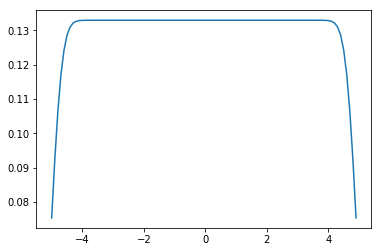

In [6]:
plt.plot(pos,kde(pos,0.3))
plt.show()

# <center> Testing on data obtained using Normal Distribution </center>

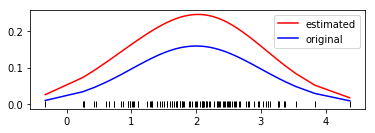

In [7]:
rand_1 = np.random.normal(2,1,100) 
rand_1 = np.sort(rand_1)
probability_density = np.zeros(np.size(rand_1))
for i in range(0,np.size(rand_1)):
    probability_density[i] = kernel(2,rand_1[i],1)
plt.subplot(2,1,1)
a = plt.plot(rand_1,kde(rand_1,0.6),'r',label='estimated')
b = plt.plot(rand_1,probability_density,'b',label='original')
plt.plot(rand_1, np.zeros(np.size(rand_1)), '|k',markeredgewidth=1)
plt.legend()
plt.show()

# <center>KNN</center>

In [8]:
def distance(a,b):
    return abs(a-b)

In [14]:
def knn(samples, k):
    samples = np.sort(samples)
    size = np.size(samples)
    density = np.zeros(size)
    for i in range(0,size):
        distance_to_k = 0
        distance_vector= np.zeros(size)
        for  j in range(0,size):
            distance_vector[j] = distance(samples[i],samples[j])
            arg_distance = distance_vector.argsort()
            temp2 = arg_distance[k-1]
            distance_to_k = distance(samples[i],samples[temp2])
            density[i] = k
            density[i]/=size
            #density[i]/=((4/3)*math.pi*distance_to_k**3)
            density[i] /= 2*distance_to_k
    return density
                

# <center>Visualization</center>

In [15]:
print(knn(pos,4))

[0.06666667 0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.0666

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


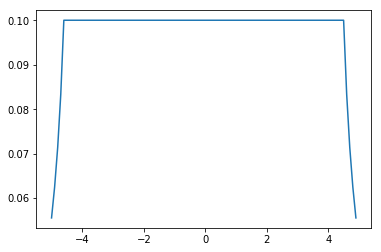

In [16]:
plt.plot(pos,knn(pos,10))
plt.show()

# <center> Testing on data obtained using Normal Distribution </center>

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


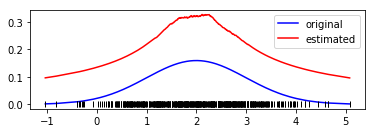

In [17]:
rand_1 = np.random.normal(2,1,500) 
rand_1 = np.sort(rand_1)
probability_density = np.zeros(np.size(rand_1))
for i in range(0,np.size(rand_1)):
    probability_density[i] = kernel(2,rand_1[i],1)
plt.subplot(2,1,1)
plt.plot(rand_1, probability_density,'b',label='original')
plt.plot(rand_1,knn(rand_1,350),'r',label='estimated')
plt.plot(rand_1, np.zeros(np.size(rand_1)), '|k',markeredgewidth=1)
plt.legend()
plt.show()

# <center>Apply method</center>

Question: Kernel/K-Nearest Neighborhood Density Estimators


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


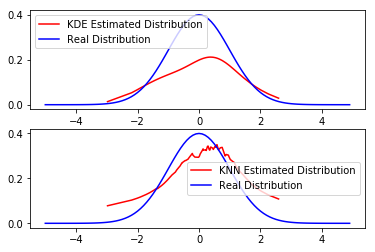

In [18]:
def parameters():
    k = 50  # knn neighbors
    h = 0.6  # kde windowsize / radius
    return h, k


def gauss1D(m, v, N, w):
    pos = np.arange(-w, w - w / N, 2 * w / N)
    insE = -0.5 * ((pos - m) / v) ** 2
    norm = 1 / (v * np.sqrt(2 * np.pi))
    res = norm * np.exp(insE)
    realDensity = np.stack((pos, res), axis=1)
    return realDensity


h, k = parameters()

print('Question: Kernel/K-Nearest Neighborhood Density Estimators')

# Produce the random samples
samples = np.random.normal(0, 1, 100)
samples = np.sort(samples)

# Compute the original normal distribution
realDensity = gauss1D(0, 1, 100, 5)

# Estimate the probability density using the KDE
estDensity = kde(samples, h)

# plot results
plt.subplot(2, 1, 1)
plt.plot(samples, estDensity, 'r', linewidth=1.5, label='KDE Estimated Distribution')
plt.plot(realDensity[:, 0], realDensity[:, 1], 'b', linewidth=1.5, label='Real Distribution')
plt.legend()

# Estimate the probability density using KNN
estDensity = knn(samples, k)

# Plot the distributions
plt.subplot(2, 1, 2)
plt.plot(samples, estDensity, 'r', linewidth=1.5, label='KNN Estimated Distribution')
plt.plot(realDensity[:, 0], realDensity[:, 1], 'b', linewidth=1.5, label='Real Distribution')
plt.legend()
plt.show()
